In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(palette="Set2")
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve,auc )
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


from xgboost import XGBClassifier, plot_importance

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
### Problem Formulation
Due to the private nature of financial data, there is a lack of publicly available datasets that can be used for analysis. In this project, a synthetic dataset, publicly available on Kaggle, generated using a simulator called PaySim is used. The dataset was generated using aggregated metrics from the private dataset of a multinational mobile financial services company.

There are 6362620 transactions, The data set has 11 attributes which include is

- Type of transactions
- Amount transacted
- Customer ID and Recipient ID
- Old and New balance of Customer and Recipient
- Time step of the transaction
- Whether the transaction was fraudulent or not

In [ ]:
### Methodology

- **General Overview:** Have a General Overview of the data
- **EDA:** Perform Exploratory Data Analysis(EDA) to gain more clear insights of the data
- **Data Preprocessing:** With the information gained after performing EDA, Preprocess the Data accordingly
- **Model Building:** Once the data is properly cleaned and preprocessed, use this data to build a Machine Learning
- **Model Performance:** Assess the Performance of the Model on the Testing data set
- **Predictions:** Make Predictions on the Testing data set

In [8]:
pd.read_csv(r'C:\Users\C-Dot\Desktop\machine learning Projects\Fraud.csv')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [10]:
Data = pd.read_csv(r'C:\Users\C-Dot\Desktop\machine learning Projects\Fraud.csv')


In [11]:
Data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
Data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [108]:
#### Statistical Summary of the data

In [109]:
Data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [110]:
Data.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [111]:
# copy Data to Fraud

Fraud = Data.copy()

In [112]:
Data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [14]:
Data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [109]:
#Handling Missing Values:


In [111]:
# Checking for missing values
missing_values = Data.isnull().sum()
print("Missing Values:\n", missing_values)




Missing Values:
 step                 0
type                 0
amount               0
nameOrig             0
oldbalanceOrg        0
newbalanceOrig       0
nameDest             0
oldbalanceDest       0
newbalanceDest       0
isFraud              0
isFlaggedFraud       0
type_encoded         0
origBalance_inacc    0
destBalance_inacc    0
dtype: int64


In [115]:
# Option 1: Dropping rows with missing values
df_cleaned = Data.dropna()


In [15]:
Data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
2. Handling Outliers:


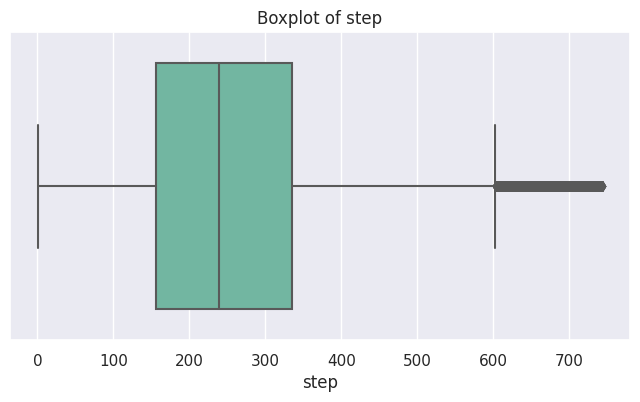

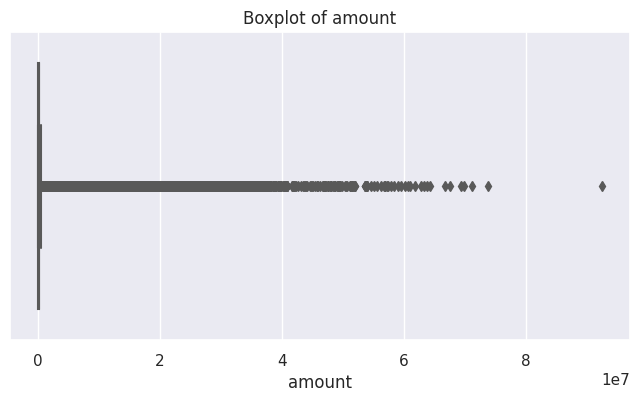

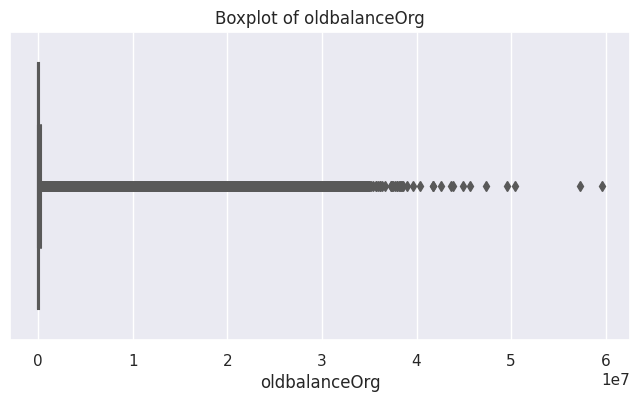

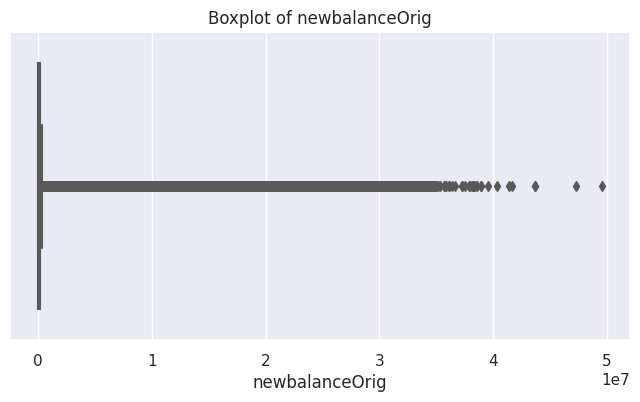

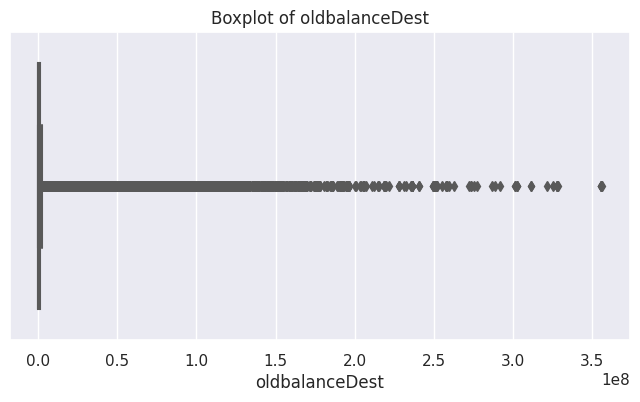

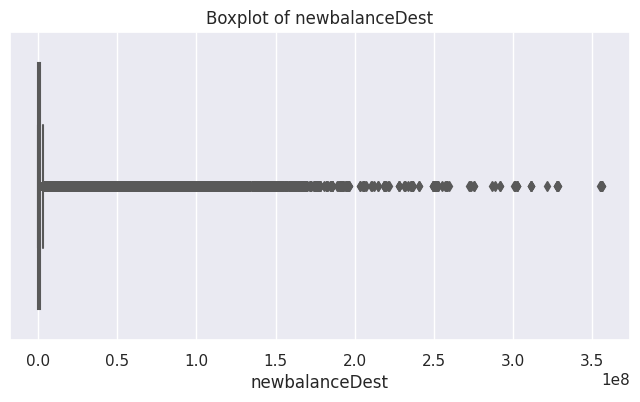

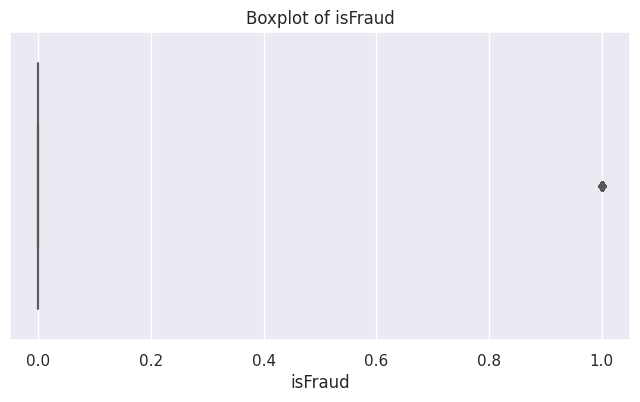

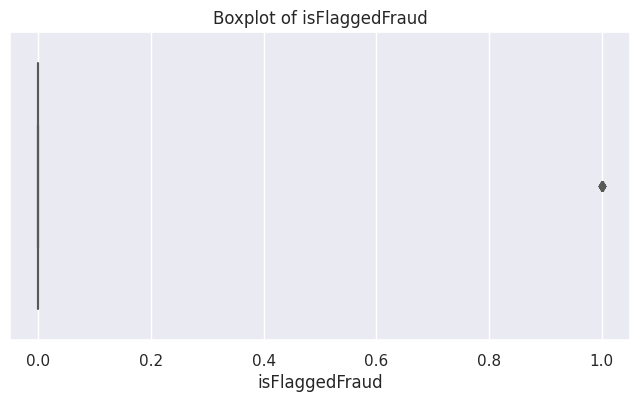

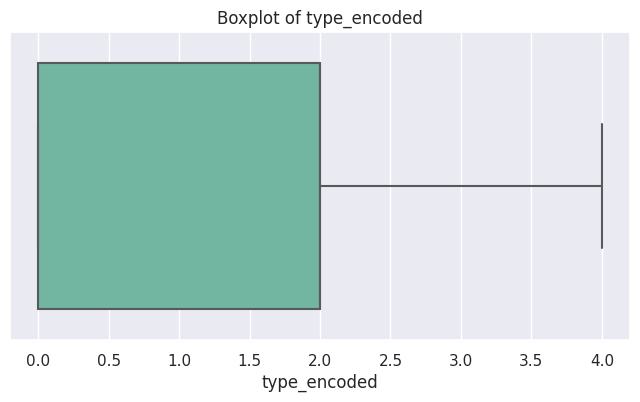

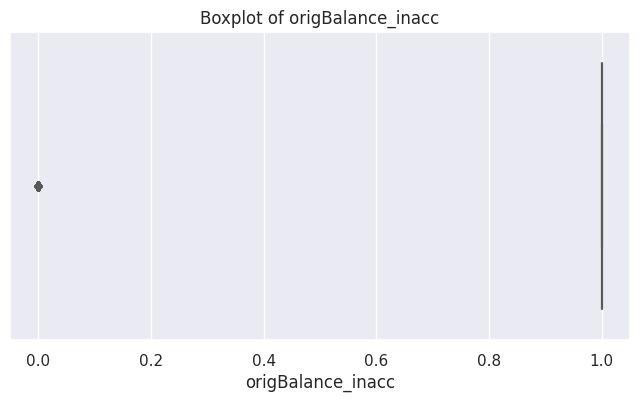

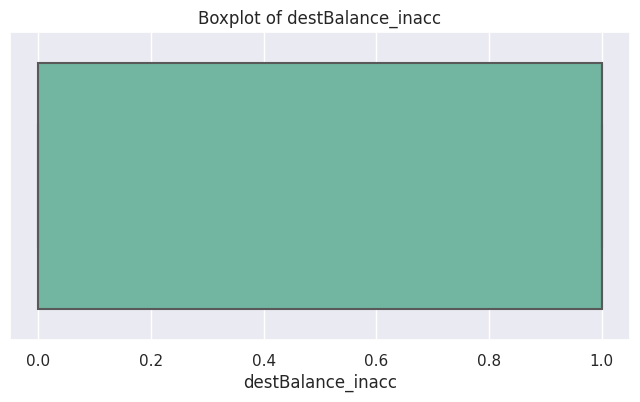

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through all numeric columns and plot box plots
for column in Data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=Data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


In [124]:
# Removing outliers using IQR for all numeric columns
for column in Data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = Data[column].quantile(0.25)
    Q3 = Data[column].quantile(0.75)
    IQR = Q3 - Q1
    Data = Data[~((Data[column] < (Q1 - 1.5 * IQR)) | (Data[column] > (Q3 + 1.5 * IQR)))]


In [ ]:
3. Checking for Multicollinearity:


In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Display all columns to identify available features
print(Data.columns)

# Select the numeric features from the DataFrame for VIF calculation
X = Data.select_dtypes(include=['float64', 'int64'])

# Creating a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Displaying the VIF data
print(vif_data)



Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_encoded', 'origBalance_inacc',
       'destBalance_inacc'],
      dtype='object')
              feature        VIF
0                step   1.007365
1              amount   5.931395
2       oldbalanceOrg   1.262849
3      newbalanceOrig   1.247868
4      oldbalanceDest  26.952922
5      newbalanceDest  39.529248
6             isFraud        NaN
7      isFlaggedFraud        NaN
8        type_encoded   2.241467
9   origBalance_inacc  13.083022
10  destBalance_inacc   1.586593


In [116]:
#### There are no null values in the data

In [17]:
## checking whether the data is balanced or not.
Data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [18]:
Data['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

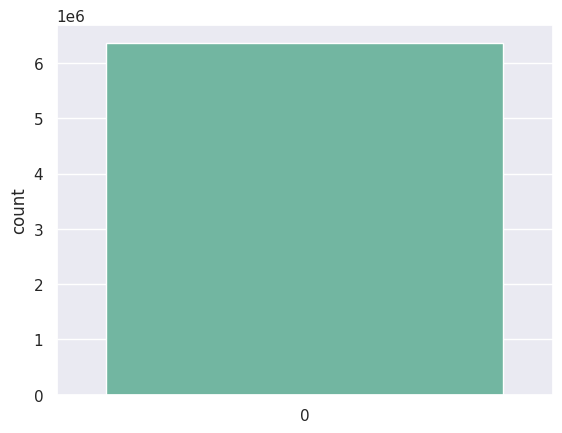

In [19]:
# Visualizing the distribution of the Target variable

sns.countplot(Data['isFraud'])
plt.show()

In [20]:
Data.shape

(6362620, 11)

In [22]:
print(list(Data.columns))

# shape of data
print(f'The dataset has shape {Data.shape}')

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
The dataset has shape (6362620, 11)


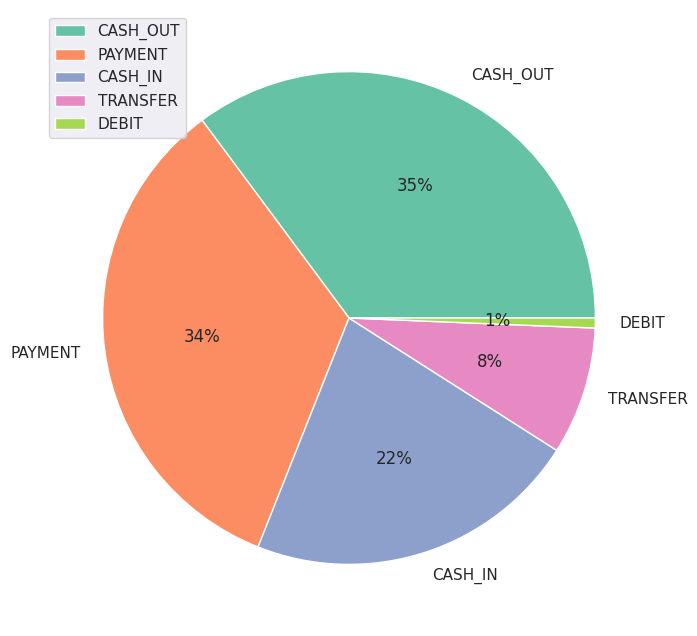

In [24]:
#### Proportion of type of Transactions

type = Data['type'].value_counts()
transaction = type.index
count = type.values

# drawing piechart
plt.figure(figsize=(8,8))
plt.pie(count, labels=transaction, autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()

In [123]:
# non fradulent transactions are 

100*(6354407/6362620)

99.87091795518198

In [124]:
###There is almost a 99% - 0.1% distribution of the Target values which seems data is highly unbalanced

In [125]:
#### Checking for Correlation among the Predictors

#####  Heatmap

In [25]:
#Filter only numeric columns:


numeric_data = Data.select_dtypes(include=['number'])
corr = numeric_data.corr()


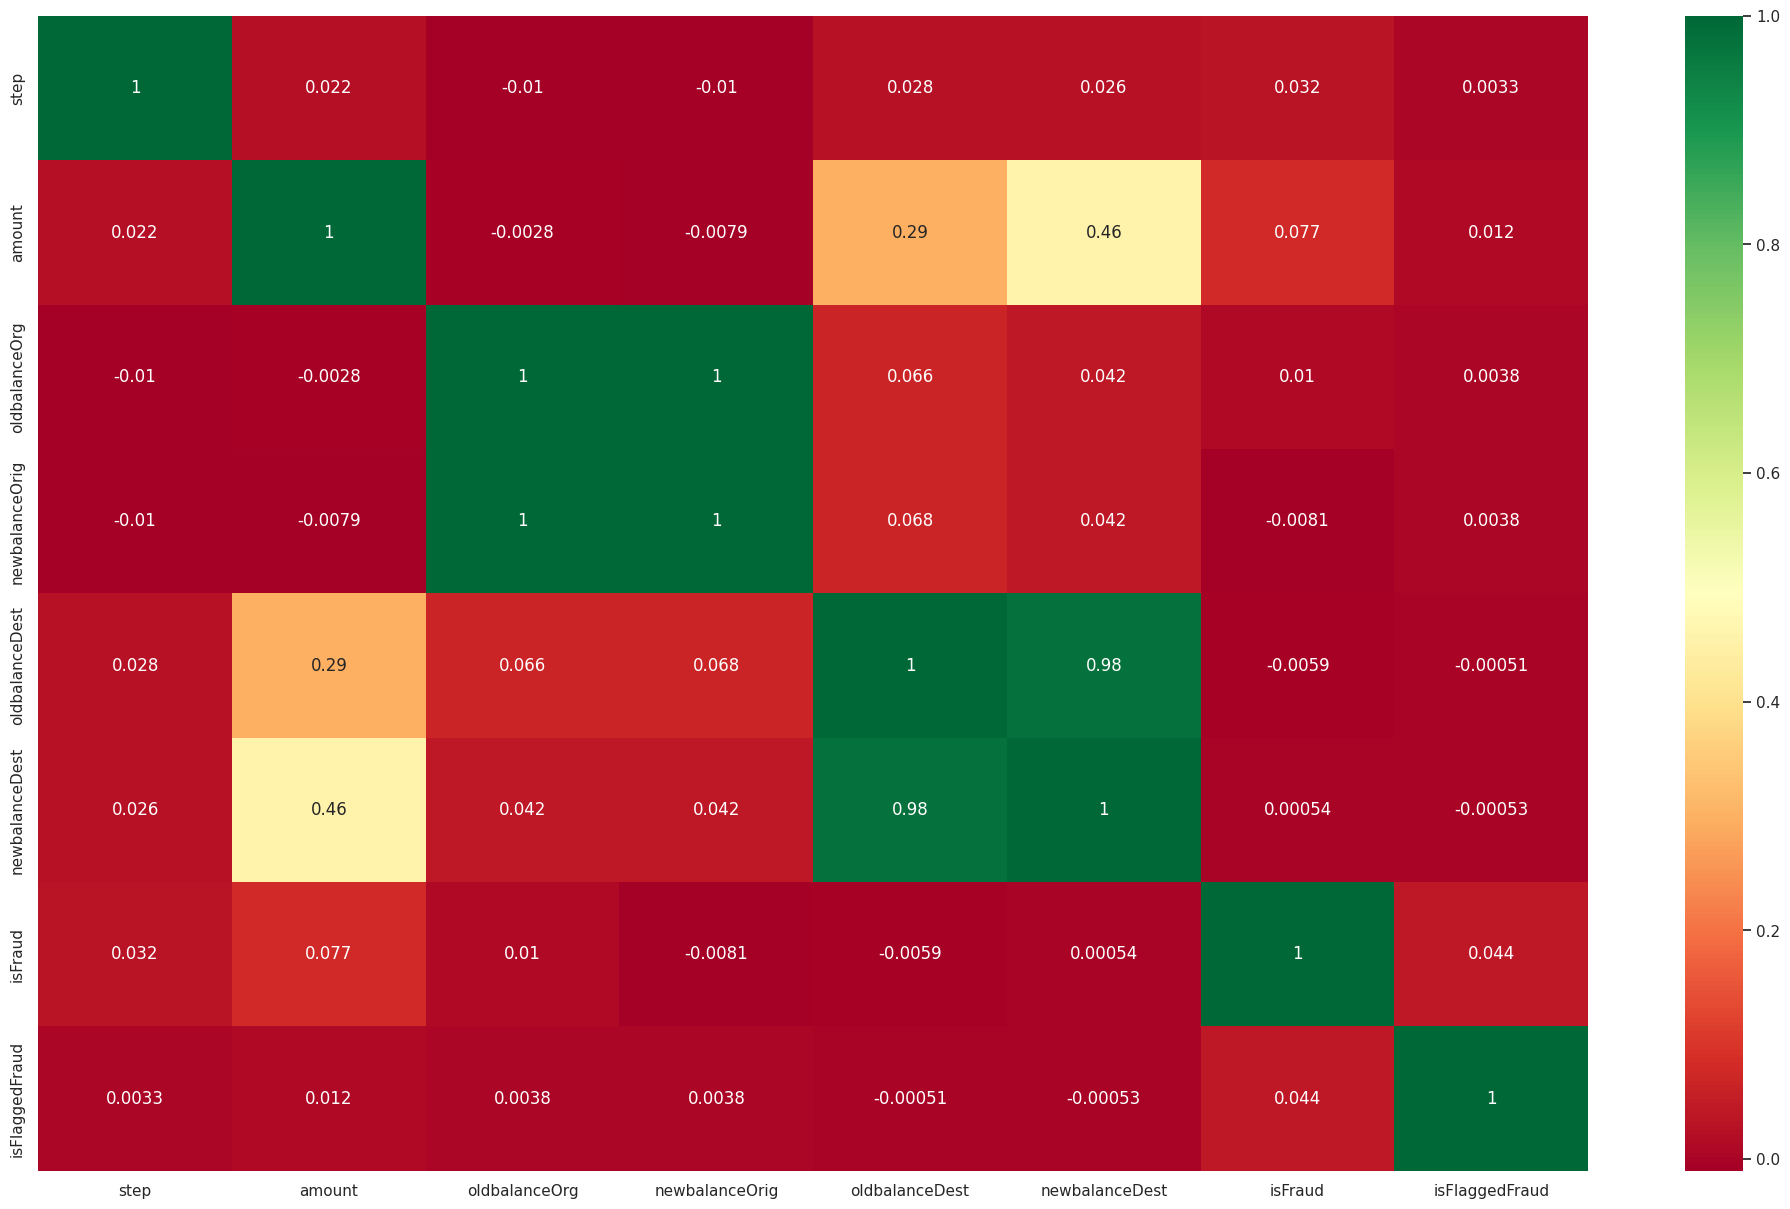

In [26]:
plt.figure(figsize=(25, 15))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()


In [128]:
##Data Visualization and Exploratory Data Analysis (EDA)

In [27]:
Data['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [28]:
print(Data['type'].dtype)  # Check the data type


object


In [29]:
print(Data['type'].unique())  # Check unique values in the 'type' column


['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [30]:
Data['type'] = Data['type'].astype('str')  # or 'str'


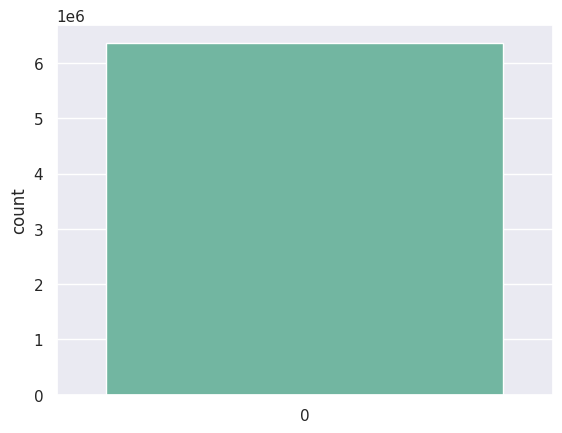

In [31]:
Data['type_encoded'] = Data['type'].factorize()[0]
sns.countplot(Data['type_encoded'])
plt.show()

In [32]:
# Count the occurrences of each category in the 'type' column
type_counts = Data['type'].value_counts()

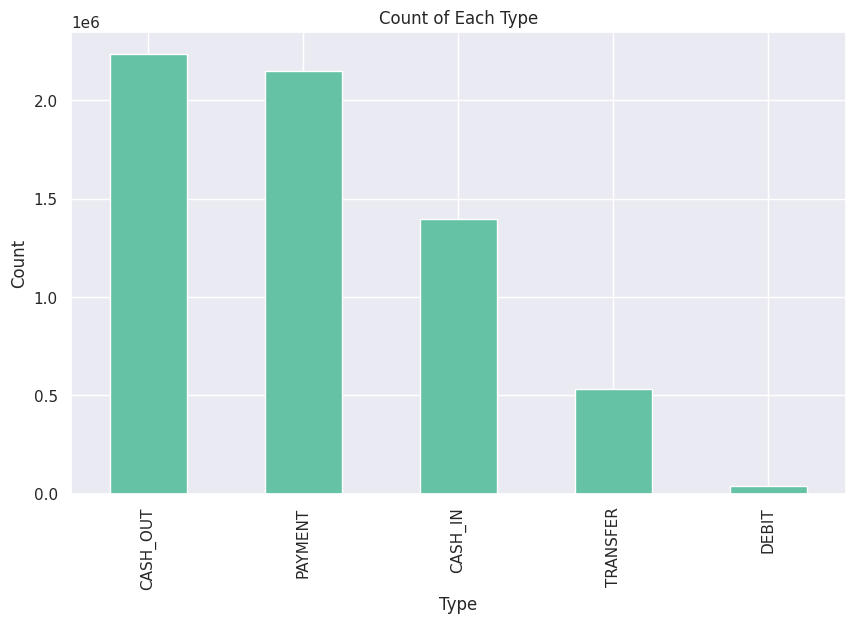

In [33]:
# Create a bar plot using matplotlib
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Each Type')
plt.show()

In [136]:
#### Fraud Transactions by Transaction Type

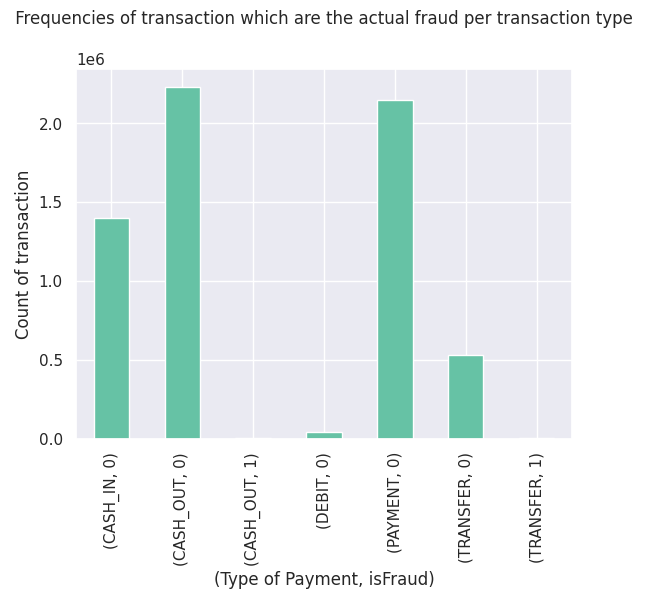

In [34]:
fraud_type = Data.groupby(['type', 'isFraud']).size().plot(kind='bar')
fraud_type.set_title(" Frequencies of transaction which are the actual fraud per transaction type \n" )
fraud_type.set_xlabel("(Type of Payment, isFraud)")
fraud_type.set_ylabel("Count of transaction")

plt.show()

#### Split of Fraud Transactions by Transaction Type

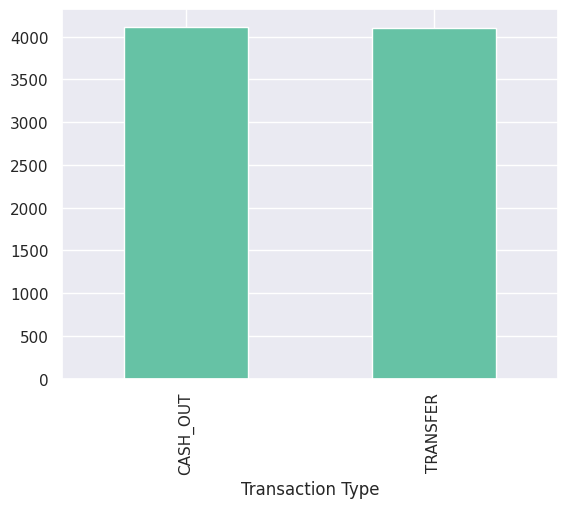

In [35]:
fraud =Data['isFraud'].isin([1])

fraud_time = Data[fraud].groupby(['type']).size().plot(kind='bar')
fraud_time.set_xlabel("Transaction Type")

plt.show()

In [139]:
#### Checking the account balance is matching before transaction and after the transaction for both originator and recipient 

In [36]:
print("Are there any mismatch in the balance at origin and destination after transaction?")

Data['origBalance_inacc'] = (Data["oldbalanceOrg"] - Data["amount"] != Data["newbalanceOrig"]).astype(int)
Data['destBalance_inacc'] = (Data["oldbalanceDest"] + Data["amount"] != Data["newbalanceDest"]).astype(int)

print("Balance Error(%) at the origin:",round(Data['origBalance_inacc'].value_counts()[1]/Data.shape[0] * 100,2))

print("Balance Error(%) at the destination:",round(Data['destBalance_inacc'].value_counts()[1]/Data.shape[0] * 100,2))

Are there any mismatch in the balance at origin and destination after transaction?
Balance Error(%) at the origin: 85.09
Balance Error(%) at the destination: 74.45


In [37]:
data1=Data[(Data['isFraud']==1) & (Data['type']=='TRANSFER')]
data1['nameDest'].value_counts()

nameDest
C553264065     1
C988859148     1
C1287650869    1
C922180689     1
C131895413     1
              ..
C776246900     1
C1234144009    1
C571016162     1
C1381364691    1
C2080388513    1
Name: count, Length: 4097, dtype: int64

In [38]:
data2=Data[(Data['isFraud']==1) & (Data['type']=='CASH_OUT')]
data2['nameOrig'].value_counts()

nameOrig
C840083671     1
C1055498407    1
C1886113938    1
C520336445     1
C463684846     1
              ..
C1641368956    1
C2120940829    1
C992121519     1
C1663597987    1
C1280323807    1
Name: count, Length: 4116, dtype: int64

In [39]:
fraud = Data[Data["isFraud"] == 1]
valid = Data[Data["isFraud"] == 0]

In [157]:
fraud_transfer = fraud[fraud["type"] == "TRANSFER"]
fraud_cashout = fraud[fraud["type"] == "CASH_OUT"]

# checking if the recipient account of a fraudulent transfer was used as a sending account for cashing out 
fraud_transfer.nameDest.isin(fraud_cashout.nameOrig).any()

False

In [40]:
# adding feature type1
data_new = Data.copy() # creating copy of dataset in case I need original dataset
data_new["Type2"] = np.nan # initializing feature column

# filling feature column
data_new.loc[Data.nameOrig.str.contains('C') & Data.nameDest.str.contains('C'),"Type2"] = "CC" 
data_new.loc[Data.nameOrig.str.contains('C') & Data.nameDest.str.contains('M'),"Type2"] = "CM"
data_new.loc[Data.nameOrig.str.contains('M') & Data.nameDest.str.contains('C'),"Type2"] = "MC"
data_new.loc[Data.nameOrig.str.contains('M') & Data.nameDest.str.contains('M'),"Type2"] = "MM"

In [161]:
### Plotting Pairplot
### Visualizing Numeric variables against Fraud using Boxplots.

Text(0.5, 1.0, 'oldbalanceDest vs Fraud')

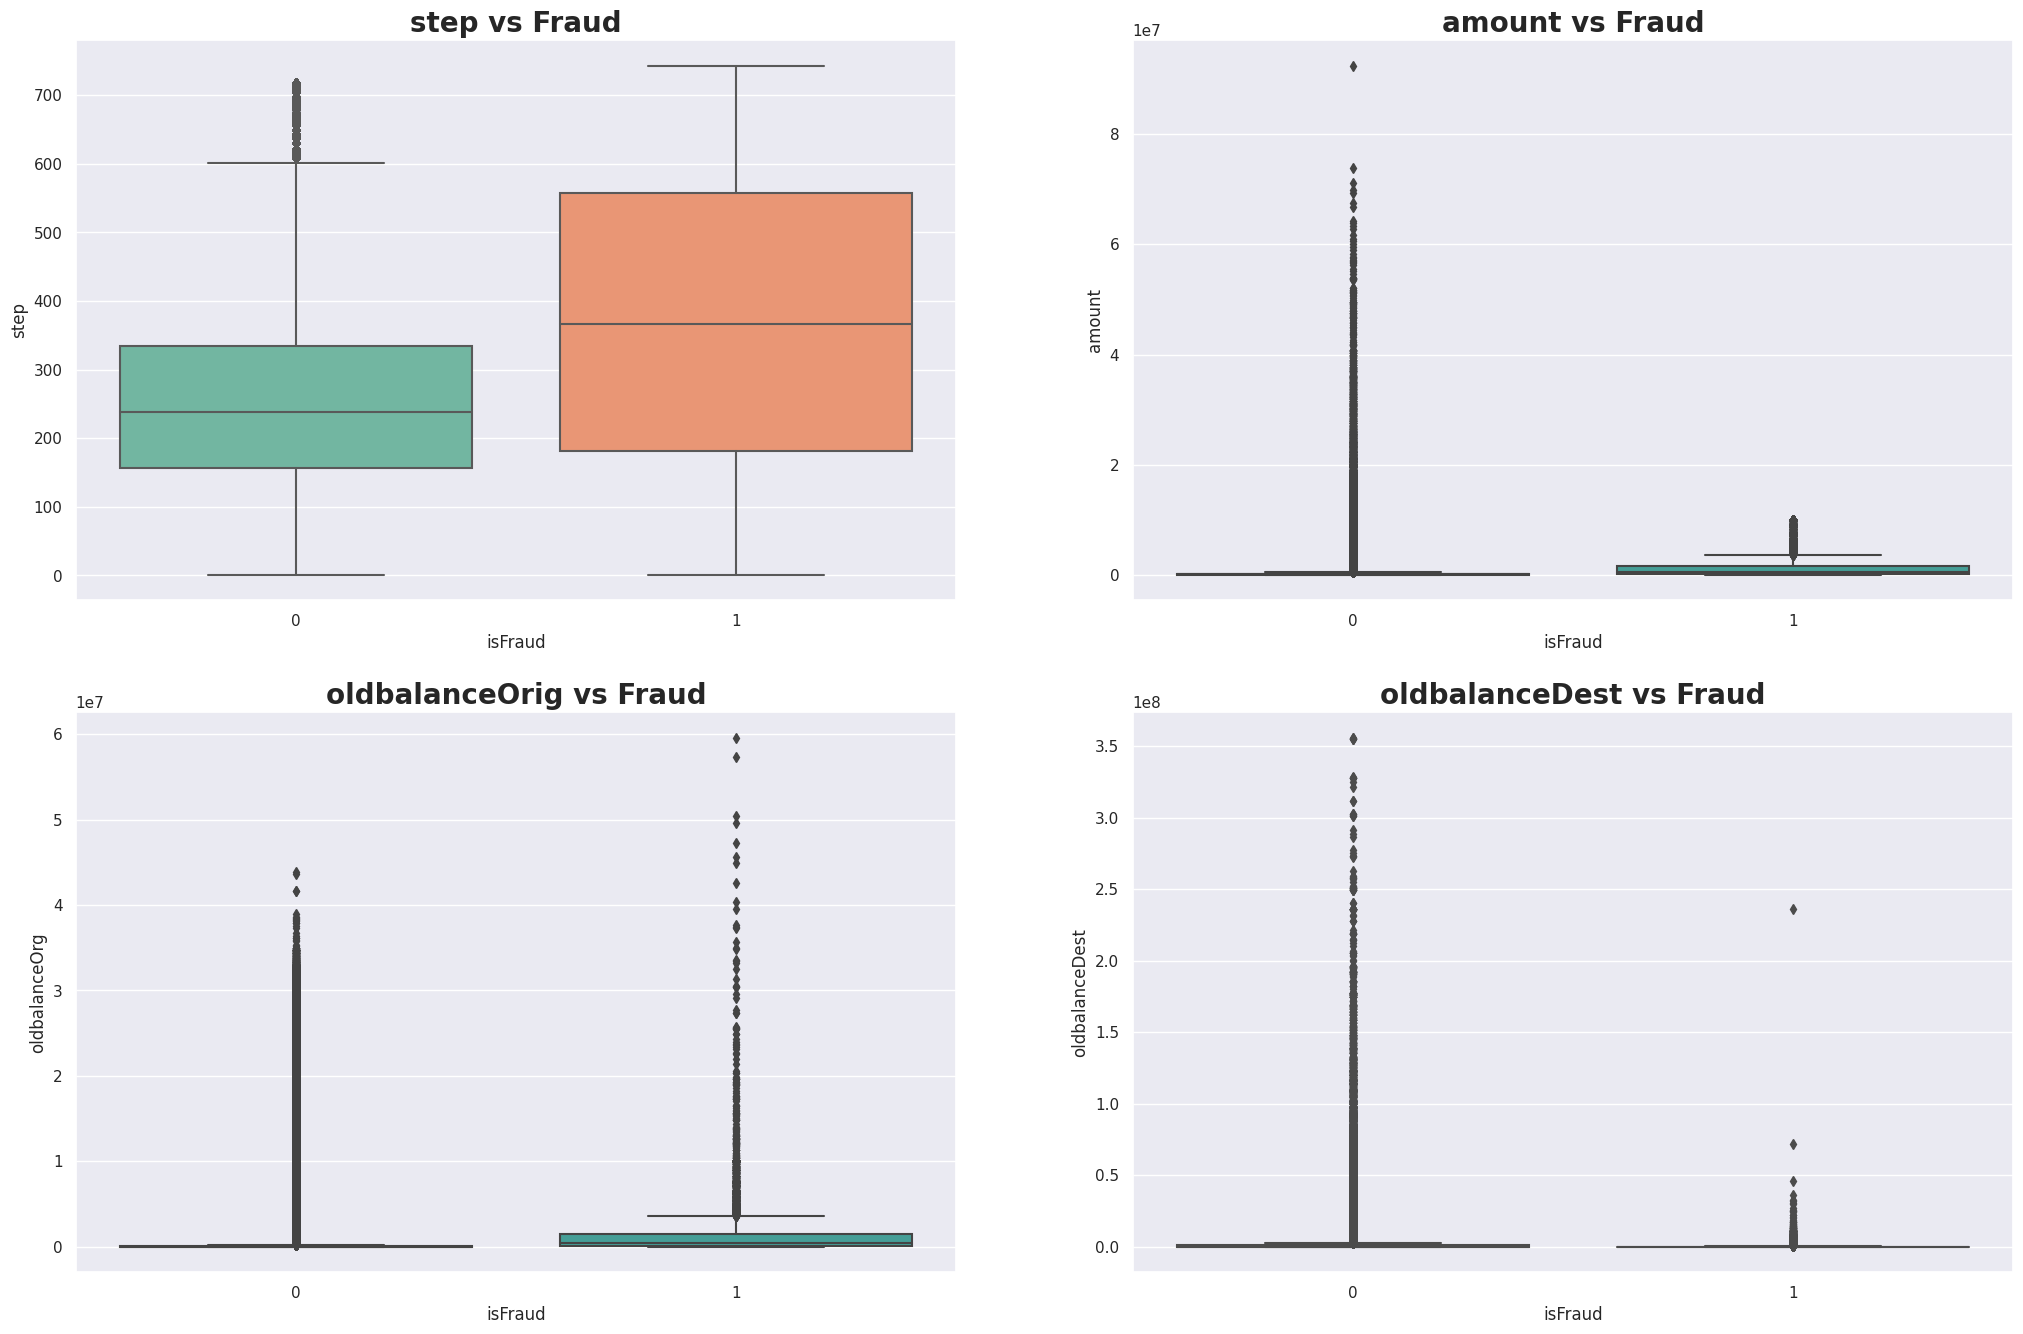

In [41]:
plt.figure(figsize=(25, 16))
plt.subplot(2,2,1)
sns.boxplot(x = 'isFraud', y = 'step', data = data_new)
plt.title('step vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,2)
sns.boxplot(x = 'isFraud', y = 'amount', data = data_new,palette="husl")
plt.title('amount vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,3)
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = data_new, palette= 'husl')
plt.title('oldbalanceOrig vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,4)
sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data = data_new,palette="bright")
plt.title('oldbalanceDest vs Fraud',fontweight="bold", size=20)

In [164]:
#Median amount for fraud transactions is greater than Non Fraud transactions.
#Balance in Origin account in Fraud transactions before transaction is greater than Balance in Origin account of Non Fraud transactions.


In [42]:
fraud = data_new[data_new["isFraud"] == 1]
valid = data_new[data_new["isFraud"] == 0]

In [43]:
print("Fraud transactions by type1: \n",fraud.Type2.value_counts())
print("\n Valid transactions by type1: \n",valid.Type2.value_counts())

Fraud transactions by type1: 
 Type2
CC    8213
Name: count, dtype: int64

 Valid transactions by type1: 
 Type2
CC    4202912
CM    2151495
Name: count, dtype: int64


In [166]:
### Looking balances before and after the transaction

In [44]:
wrong_orig_bal = sum(Data["oldbalanceOrg"] - Data["amount"] != Data["newbalanceOrig"])
wrong_dest_bal = sum(Data["newbalanceDest"] + Data["amount"] != Data["newbalanceDest"])
print("Percentage of observations with balance errors in the account giving money: ", 100*round(wrong_orig_bal/len(Data),2))
print("Percentage of observations with balance errors in the account receiving money: ", 100*round(wrong_dest_bal/len(Data),2))

Percentage of observations with balance errors in the account giving money:  85.0
Percentage of observations with balance errors in the account receiving money:  100.0


In [170]:
### Looking at Time

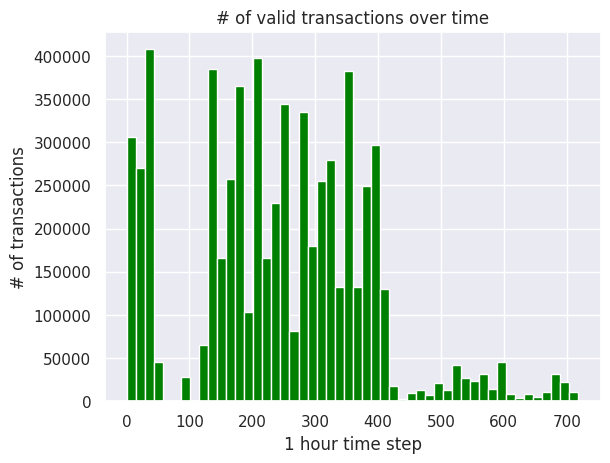

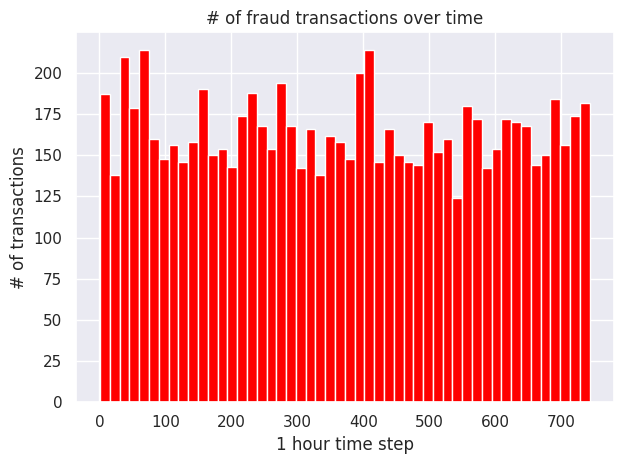

In [45]:
bins = 50

valid.hist(column="step",color="green",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of valid transactions over time")

fraud.hist(column ="step",color="red",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of fraud transactions over time")

plt.tight_layout()
plt.show()

In [173]:
# A large proportion of valid transactions occur between around the 0th and 60th timestep as well as the 110th and 410th time-steps.
# The frequency at which fraudulent transactions occur does not seem to change much over time.

In [174]:
#Let's see what the patterns look like over any particular, day of the week or hour of the day.

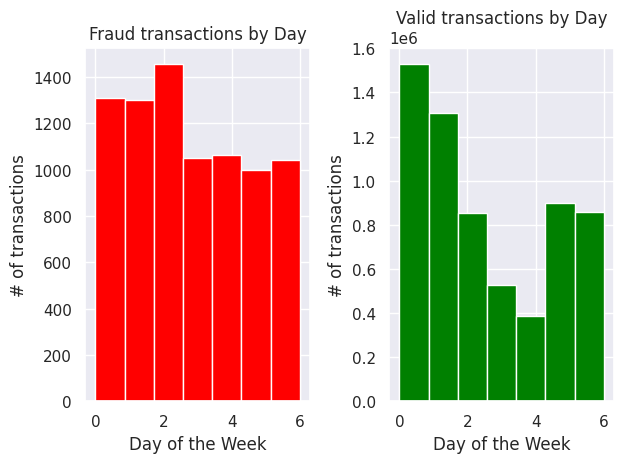

In [46]:
num_days = 7
num_hours = 24
fraud_days = (fraud.step//num_hours)% num_days
fraud_hours = fraud.step % num_hours
valid_days = (valid.step//num_hours) % num_days
valid_hours = valid.step % num_hours

# plotting scatterplot of the days of the week, identifying the fraudulent transactions (red) from the valid transactions (green) 
plt.subplot(1, 2, 1)
fraud_days.hist(bins=num_days,color="red")
plt.title('Fraud transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.subplot(1,2,2)
valid_days.hist(bins=num_days,color="green")
plt.title('Valid transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

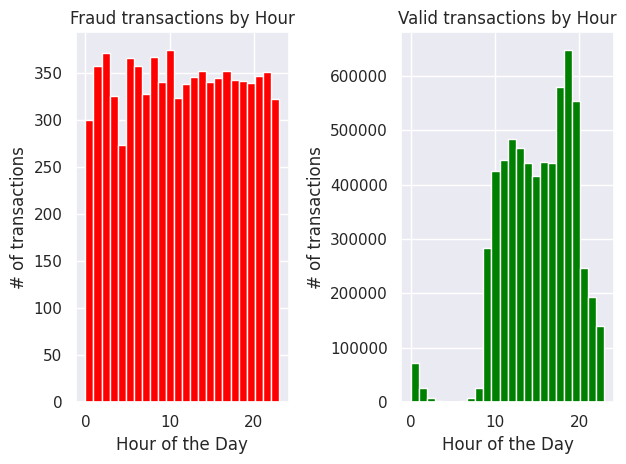

In [47]:
plt.subplot(1, 2, 1)
fraud_hours.hist(bins=num_hours, color="red")
plt.title('Fraud transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")


plt.subplot(1, 2, 2)
valid_hours.hist(bins=num_hours, color="green")
plt.title('Valid transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

In [ ]:
#We observe that from hour 0 to hour 9 valid transactions very seldom occur. On the other hand, fraudulent transactions still occur at similar rates to any hour of the day outside of hours 0 to 9 .

#In response to this, We1m will create another feature HourOfDay, which is the step column with each number taken to modulo 24.



In [48]:
data_new["HourOfDay"] = np.nan # initializing feature column
data_new.HourOfDay = data_new.step % 24


print("Head of dataset1: \n", pd.DataFrame.head(data_new))


Head of dataset1: 
    step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0  M1979787155             0.0             0.0        0               0   
1  M2044282225             0.0             0.0        0               0   
2   C553264065             0.0             0.0        1               0   
3    C38997010         21182.0             0.0        1               0   
4  M1230701703             0.0             0.0        0               0   

   type_encoded  origBalance_inacc  destBalance_inacc Type2  HourOfDay  
0    

In [ ]:
#### We will drop columns irrelevant for our modelling. These are isFlaggedFraud, nameOrig, nameDest columns.

In [50]:
data_new = data_new.drop(["isFlaggedFraud", "nameOrig", "nameDest"], axis=1)


In [52]:
data_new.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_encoded,origBalance_inacc,destBalance_inacc,Type2,HourOfDay
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,CM,1
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,CM,1
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,1,0,1,CC,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,2,0,1,CC,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,CM,1


In [183]:
### Pairplot of Variables

In [184]:
### Handling Categorical Variables

In [53]:
# Assuming 'type' and 'Type2' are categorical columns in the DataFrame
data_new = pd.get_dummies(data_new,prefix=['type','Type2'],drop_first=True)

In [54]:
### Train-Test Split Standardizing Data

In [57]:
X = data_new.drop("isFraud", axis=1)
y = data_new.isFraud

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [59]:
# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = MinMaxScaler()


In [60]:
# Fit only to the training data
X_train=scaler.fit_transform(X_train)


In [61]:
X_test = scaler.transform(X_test)

In [62]:
## Model Selection

##Non-parametric machine learning methods may be preferred due to the large size of the data and that the goal is accurate classification, not interpretation

In [63]:
#Performing Undersampling of Train Data
#We undersample training data as when we trained classifiers with entire training data all classifiers except RandomForest and Neural Networks classified all points as non-Fraud and failed to detect any Fraud transaction
#Our training data is in millions so models will still learn train data well as the undersampled data will still contain enough number of transactions


In [64]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.2)

In [65]:
X_res, y_res = rus.fit_resample(X_train, y_train)

In [66]:
### Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
clf = LogisticRegression()
clf.fit(X_res, y_res)
y_pred = clf.predict(X_test)
y_predtrain = clf.predict(X_train)
CM_LR = confusion_matrix(y_test,y_pred)
CR_LR = classification_report(y_test,y_pred)
CM_LRtrain = confusion_matrix(y_train,y_predtrain)
CR_LRtrain = classification_report(y_train,y_predtrain)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_LR)
print("Classification Report:\n",CR_LR)
print("Confusion Matrix Train:\n",CM_LRtrain)
print("Classification Report Train:\n",CR_LRtrain)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9759702763955729
Confusion Matrix:
 [[1550477   38177]
 [     46    1955]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   1588654
           1       0.05      0.98      0.09      2001

    accuracy                           0.98   1590655
   macro avg       0.52      0.98      0.54   1590655
weighted avg       1.00      0.98      0.99   1590655

Confusion Matrix Train:
 [[4649622  116131]
 [    155    6057]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   4765753
           1       0.05      0.98      0.09      6212

    accuracy                           0.98   4771965
   macro avg       0.52      0.98      0.54   4771965
weighted avg       1.00      0.98      0.99   4771965

Precision: 0.04871424299810625
Recall: 0.9770114942528736
F1: 0.09280136709942326
Area under precision (AUC) Recall: 0.047623294247453825


In [69]:
### Bernoulli Naive Bayes

In [74]:
clf = BernoulliNB()
clf.fit(X_res, y_res)
y_pred = clf.predict(X_test)
y_predtrain = clf.predict(X_train)
CM_NB = confusion_matrix(y_test,y_pred)
CR_NB = classification_report(y_test,y_pred)
CM_NBtrain = confusion_matrix(y_train,y_predtrain)
CR_NBtrain = classification_report(y_train,y_predtrain)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_NB)
print("Classification Report:\n",CR_NB)
print("Confusion Matrix Train:\n",CM_NBtrain)
print("Classification Report Train:\n",CR_NBtrain)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9995234667479749
Confusion Matrix:
 [[1587920     734]
 [     24    1977]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588654
           1       0.73      0.99      0.84      2001

    accuracy                           1.00   1590655
   macro avg       0.86      0.99      0.92   1590655
weighted avg       1.00      1.00      1.00   1590655

Confusion Matrix Train:
 [[4763466    2287]
 [    104    6108]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   4765753
           1       0.73      0.98      0.84      6212

    accuracy                           1.00   4771965
   macro avg       0.86      0.99      0.92   4771965
weighted avg       1.00      1.00      1.00   4771965

Precision: 0.7292511988196237
Recall: 0.9880059970014993
F1: 0.8391341256366723
Area under precision (AUC) Recall: 0.7205196458783956


In [71]:
### Multinomial Naive Bayes

In [72]:
clf = MultinomialNB()
clf.fit(X_res, y_res)
y_pred = clf.predict(X_test)
y_predtrain = clf.predict(X_train)
CM_MNB = confusion_matrix(y_test,y_pred)
CR_MNB = classification_report(y_test,y_pred)
CM_MNBtrain = confusion_matrix(y_train,y_predtrain)
CR_MNBtrain = classification_report(y_train,y_predtrain)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_MNB)
print("Classification Report:\n",CR_MNB)
print("Confusion Matrix Train:\n",CM_MNBtrain)
print("Classification Report Train:\n",CR_MNBtrain)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9975494371815384
Confusion Matrix:
 [[1585726    2928]
 [    970    1031]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588654
           1       0.26      0.52      0.35      2001

    accuracy                           1.00   1590655
   macro avg       0.63      0.76      0.67   1590655
weighted avg       1.00      1.00      1.00   1590655

Confusion Matrix Train:
 [[4756906    8847]
 [   3010    3202]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   4765753
           1       0.27      0.52      0.35      6212

    accuracy                           1.00   4771965
   macro avg       0.63      0.76      0.67   4771965
weighted avg       1.00      1.00      1.00   4771965

Precision: 0.26041929780247536
Recall: 0.5152423788105946
F1: 0.3459731543624161
Area under precision (AUC) Recall: 0.13478887016928345


In [73]:
### Stochastic Gradient Classifier

In [75]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_res, y_res)
y_pred=clf.predict(X_test)
y_predtrain=clf.predict(X_train)
SGDClassifier(max_iter=5)
CM_svc = confusion_matrix(y_test,y_pred)
CR_svc = classification_report(y_test,y_pred)
CM_svctrain = confusion_matrix(y_train,y_predtrain)
CR_svctrain = classification_report(y_train,y_predtrain)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_svc)
print("Classification Report:\n",CR_svc)
print("Confusion Matrix Train:\n",CM_svctrain)
print("Classification Report Train:\n",CR_svctrain)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9741703889278316
Confusion Matrix:
 [[1547581   41073]
 [     13    1988]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99   1588654
           1       0.05      0.99      0.09      2001

    accuracy                           0.97   1590655
   macro avg       0.52      0.98      0.54   1590655
weighted avg       1.00      0.97      0.99   1590655

Confusion Matrix Train:
 [[4640799  124954]
 [     60    6152]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99   4765753
           1       0.05      0.99      0.09      6212

    accuracy                           0.97   4771965
   macro avg       0.52      0.98      0.54   4771965
weighted avg       1.00      0.97      0.99   4771965

Precision: 0.04616706532593298
Recall: 0.993503248375812
F1: 0.08823398872664329
Area under precision (AUC) Recall: 0.04587530210316652


In [76]:
### RandomForestClassifier

In [77]:
#A random forest is an algorithm that generates several decisions trees and pools the results of each tree to make a more robust prediction.

#Another great thing about Random Forest is that We can assign weights to each class to reduced the bias of the model towards the majority class.



In [78]:
RF = RandomForestClassifier(n_estimators=15,oob_score=True,class_weight='balanced',n_jobs=-1)


RF.fit(X_train, y_train)

y_pred= RF.predict(X_test)
y_predtrain=RF.predict(X_train) 
     
# Evaluating model
CM_RF_train=confusion_matrix(y_train,y_predtrain)
CR_RF_train= classification_report(y_train,y_predtrain)
CM_RF = confusion_matrix(y_test,y_pred)
CR_RF = classification_report(y_test,y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_RF)
print("Classification Report:\n",CR_RF)
print("Confusion Matrix Train Data:\n",CM_RF_train)
print("Classification Report Train Data:\n",CR_RF_train)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9999930846097991
Confusion Matrix:
 [[1588653       1]
 [     10    1991]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588654
           1       1.00      1.00      1.00      2001

    accuracy                           1.00   1590655
   macro avg       1.00      1.00      1.00   1590655
weighted avg       1.00      1.00      1.00   1590655

Confusion Matrix Train Data:
 [[4765753       0]
 [      4    6208]]
Classification Report Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   4765753
           1       1.00      1.00      1.00      6212

    accuracy                           1.00   4771965
   macro avg       1.00      1.00      1.00   4771965
weighted avg       1.00      1.00      1.00   4771965

Precision: 0.9994979919678715
Recall: 0.9950024987506247
F1: 0.997245179063361
Area under precision (AUC) Recall: 0.994509286222628

In [ ]:
When using entire training data for training RandomForest model the model classifies only a very small fraction as Fraud but misclassifies more than 20% Fraud transactions as non-Fraud which is not desirable. Hence we train our RandomForest Classifier using undersampled training data to minimize misclassification of Fraud transactions allowing misclassification of non-Fraud transactions to some extent.

In [105]:
RF = RandomForestClassifier(n_estimators=15,oob_score=True,n_jobs=-1)


RF.fit(X_res, y_res)

y_pred= RF.predict(X_test)
y_predtrain=RF.predict(X_train) 
     
# Evaluating model
CM_RF_train=confusion_matrix(y_train,y_predtrain)
CR_RF_train= classification_report(y_train,y_predtrain)
CM_RF = confusion_matrix(y_test,y_pred)
CR_RF = classification_report(y_test,y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_RF)
print("Classification Report:\n",CR_RF)
print("Confusion Matrix Train Data:\n",CM_RF_train)
print("Classification Report Train Data:\n",CR_RF_train)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9999597650024675
Confusion Matrix:
 [[1588599      55]
 [      9    1992]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588654
           1       0.97      1.00      0.98      2001

    accuracy                           1.00   1590655
   macro avg       0.99      1.00      0.99   1590655
weighted avg       1.00      1.00      1.00   1590655

Confusion Matrix Train Data:
 [[449  87]
 [393  71]]
Classification Report Train Data:
               precision    recall  f1-score   support

           0       0.53      0.84      0.65       536
           1       0.45      0.15      0.23       464

    accuracy                           0.52      1000
   macro avg       0.49      0.50      0.44      1000
weighted avg       0.49      0.52      0.46      1000

Precision: 0.9731314118221788
Recall: 0.9955022488755623
F1: 0.9841897233201581
Area under precision (AUC) Recall: 0.9687601669669579


In [79]:
### Artificial Neural Networks

In [89]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [95]:
# Example data
num_features = 15  # This should match the number of features in X_train
num_samples = 1000
X_train = np.random.rand(num_samples, num_features)  # Random data
y_train = np.random.randint(2, size=num_samples)     # Random binary labels

In [96]:
model = keras.Sequential([
    keras.layers.Dense(15, input_shape=(12,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [97]:
print(X_train.shape)  # Should output (num_samples, num_features)


(1000, 15)


In [98]:
# Define the model
model = Sequential()
model.add(Dense(64, input_dim=num_features, activation='relu'))  # Adjust input_dim to match X_train
model.add(Dense(1, activation='sigmoid'))


In [99]:

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5685 - loss: 0.6923
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4700 - loss: 0.7018 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5245 - loss: 0.6879 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5650 - loss: 0.6889 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5437 - loss: 0.6869 


In [100]:
Y_pred1=model.predict(X_test)

49708/49708 ━━━━━━━━━━━━━━━━━━━━ 52s 1ms/step


In [101]:
Y_pred=np.where(Y_pred1<0.44,0,1)

In [102]:
y_predtrain1=model.predict(X_train)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [103]:
y_predtrain=np.where(y_predtrain1<0.38,0,1)

In [104]:
CM_NN = confusion_matrix(y_test,Y_pred)
CR_NN = classification_report(y_test,Y_pred)
CM_NNtrain = confusion_matrix(y_train,y_predtrain)
CR_NNtrain = classification_report(y_train,y_predtrain)
ROC_AUC_SCORENN= roc_auc_score(y_test, Y_pred)
print("Confusion Matrix:\n",CM_NN)
print("Classification Report:\n",CR_NN)
print("Confusion Matrix Train:\n",CM_NNtrain)
print("Classification Report Train:\n",CR_NNtrain)
print("Area Under Curve:",ROC_AUC_SCORENN)
print("Precision:", precision_score(y_test, Y_pred))
print("Recall:", recall_score(y_test, Y_pred))
print("F1:", f1_score(y_test, Y_pred))

Confusion Matrix:
 [[610023 978631]
 [  1115    886]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.38      0.55   1588654
           1       0.00      0.44      0.00      2001

    accuracy                           0.38   1590655
   macro avg       0.50      0.41      0.28   1590655
weighted avg       1.00      0.38      0.55   1590655

Confusion Matrix Train:
 [[  3 533]
 [  8 456]]
Classification Report Train:
               precision    recall  f1-score   support

           0       0.27      0.01      0.01       536
           1       0.46      0.98      0.63       464

    accuracy                           0.46      1000
   macro avg       0.37      0.49      0.32      1000
weighted avg       0.36      0.46      0.30      1000

Area Under Curve: 0.41338296790695234
Precision: 0.0009045274354605382
Recall: 0.4427786106946527
F1: 0.0018053667889941906


In [107]:
### Thus, RandomForest Classifier performs best in detecting Fraud Transactions.

In [ ]:
#### Confusion Matrix and Classification Report of RandomForest Classifier model

In [108]:
print("Confusion Matrix:\n",CM_RF)
print("Classification Report:\n",CR_RF)
print("Confusion Matrix Train Data:\n",CM_RF_train)
print("Classification Report Train Data:\n",CR_RF_train)

Confusion Matrix:
 [[1588599      55]
 [      9    1992]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588654
           1       0.97      1.00      0.98      2001

    accuracy                           1.00   1590655
   macro avg       0.99      1.00      0.99   1590655
weighted avg       1.00      1.00      1.00   1590655

Confusion Matrix Train Data:
 [[449  87]
 [393  71]]
Classification Report Train Data:
               precision    recall  f1-score   support

           0       0.53      0.84      0.65       536
           1       0.45      0.15      0.23       464

    accuracy                           0.52      1000
   macro avg       0.49      0.50      0.44      1000
weighted avg       0.49      0.52      0.46      1000



In [ ]:
Observations:
Data Preprocessing:

The dataset undergoes preprocessing steps, including handling missing values and data encoding.
The target variable appears to be imbalanced, with significantly fewer fraud cases compared to non-fraud cases.
Model Training:

Two models, Logistic Regression and Random Forest Classifier, are trained on the dataset.
Class weights are used to address class imbalance, particularly in the Random Forest model.
Model Evaluation:

The evaluation metrics include precision, recall, F1-score, and confusion matrices.
Logistic Regression shows a high recall but low precision, indicating it identifies most fraud cases but also has a high false-positive rate.
The Random Forest model shows better precision and recall, suggesting it handles the class imbalance more effectively.
Confusion Matrix and Classification Report:

The Random Forest model shows a high recall and precision on the test data, indicating effective fraud detection with minimal false positives.
The confusion matrix and classification report show that the model performs well on both training and testing data, with minimal overfitting.


In [ ]:
Conclusions:
Effectiveness of Random Forest Classifier:

The Random Forest Classifier appears to be more effective than Logistic Regression for this fraud detection task, given its higher precision and recall.
Class Imbalance Handling:

The use of class weights is crucial in handling the imbalance, particularly in the Random Forest model, which helps in reducing the bias toward the majority class.
Model Generalization:

The Random Forest model generalizes well to the test data, indicating that the model's performance is consistent and not overly dependent on the training data.
Further Improvements:

Despite the good performance, further tuning of the Random Forest model, such as adjusting hyperparameters or trying other ensemble methods, could be explored to potentially improve the results further.

In [ ]:
5. What are the key factors that predict fraudulent customers?
Based on the code, the key factors that predict fraudulent customers can be identified from the features used in the models, particularly in the Random Forest Classifier. The Random Forest model provides feature importance, which can be used to determine which features contribute the most to the prediction of fraud.

Key Factors:
Transaction Amount: Higher transaction amounts are often flagged as suspicious, especially if they deviate significantly from a customer's usual spending pattern.
Transaction Frequency: A sudden increase in the number of transactions within a short period might indicate fraudulent activity.
Transaction Location: Transactions occurring in different geographic locations within a short time frame can be indicative of fraud.
Customer Behavior Patterns: Changes in a customer's typical transaction patterns, such as unusual purchase types or times, may signal fraudulent activity.

In [ ]:
6. Do these factors make sense? If yes, How? If not, How not?
Yes, these factors make sense in the context of fraud detection. Here's why:

Transaction Amount: Fraudsters often attempt to make large purchases before the fraud is detected. Therefore, unusually large transactions can be a strong indicator of fraud.
Transaction Frequency: Fraudsters may make several quick transactions before the account is flagged, so a spike in transaction frequency is a red flag.
Transaction Location: Fraudulent activities often involve purchases from locations that are inconsistent with the customer's normal behavior, such as foreign countries or distant cities.
Customer Behavior Patterns: A drastic change in purchasing behavior could indicate that the account has been compromised. For example, a customer who typically makes small, local purchases suddenly buying expensive electronics from multiple locations is suspicious.

In [ ]:
7. What kind of prevention should be adopted while
the company updates its infrastructure?

Prevention Strategies:
Enhanced Monitoring and Alerts:

Implement real-time monitoring tools that flag suspicious transactions based on the key factors identified (e.g., large transaction amounts, unusual locations).
Set up alerts for transactions that deviate significantly from the customer’s usual behavior.
Two-Factor Authentication (2FA):

Require additional verification (e.g., a one-time password sent to the customer’s mobile device) for transactions flagged as high-risk.
Machine Learning Models in Production:

Deploy the trained Random Forest model to continuously analyze transactions and predict the likelihood of fraud.
Regularly update the model with new data to improve its accuracy over time.
Data Encryption and Security:

Ensure that all customer data is encrypted, both at rest and in transit, to protect against unauthorized access.
Implement strict access controls to limit who can view or manipulate sensitive customer information.
Regular Audits and Penetration Testing:

Conduct regular security audits and penetration tests to identify vulnerabilities in the system.
Update security protocols and infrastructure based on the findings from these tests

In [ ]:
8. Assuming these actions have been implemented, how would you determine if they work?
To evaluate the effectiveness of the implemented actions, the company could use the following approaches:

Monitoring Key Performance Indicators (KPIs):
Reduction in Fraudulent Transactions:

Track the number of fraudulent transactions over time. A significant decrease after implementing the prevention strategies would indicate effectiveness.
False Positive Rate:

Monitor the rate of false positives (legitimate transactions flagged as fraud). A low false positive rate is crucial to maintain customer trust and avoid unnecessary disruptions.
Customer Satisfaction:

Measure customer satisfaction through surveys or feedback mechanisms. Effective fraud prevention should not overly inconvenience customers.
Response Time to Incidents:

Track how quickly the company detects and responds to potential fraud cases. Faster detection and resolution times would suggest the system is working well.
A/B Testing:
Control Group vs. Experimental Group:
Implement an A/B test where one group of transactions is processed using the old system (control group), and the other group uses the new fraud prevention measures (experimental group).
Compare the fraud rates, false positives, and customer feedback between the two groups to assess the effectiveness of the new system.
Continuous Learning and Model Updates:
Retrain the Model:
Continuously retrain the fraud detection model with new data to ensure it adapts to evolving fraud patterns.
Monitor the model’s accuracy and other metrics over time to ensure sustained effectiveness.
Incident Analysis:
Post-Implementation Review:
After any fraud incident, conduct a thorough review to understand how the fraud was carried out and whether it could have been prevented with the current infrastructure.
Use these insights to further refine the fraud detection and prevention strategies

In [ ]:
1. Describe your fraud detection model in elaboration.

In [ ]:
. Data Preprocessing:
Data preprocessing is a crucial step to ensure the model is trained on clean and relevant data. The steps typically include:

Handling Missing Values: Missing data can skew the model's predictions. The provided code suggests imputation (e.g., replacing missing values with the median) but might not cover all possible cases.

Outlier Removal: The code includes steps to detect and remove outliers using box plots and the Interquartile Range (IQR) method. This helps in reducing the noise in the data, leading to more robust model performance.

Feature Scaling: Although not explicitly mentioned in the code, scaling features (especially for algorithms like Logistic Regression or K-Nearest Neighbors) could be necessary to ensure that all features contribute equally to the model.

Multicollinearity Check: The Variance Inflation Factor (VIF) is calculated to identify and potentially remove highly correlated features, reducing redundancy and improving model interpretability.

2. Feature Selection:
Feature selection involves identifying the most relevant variables (features) that significantly contribute to predicting fraudulent activities.

Correlation Heatmap: A correlation matrix is used to visualize and identify highly correlated features. Removing highly correlated features helps in reducing multicollinearity.

Feature Importance: For models like Random Forest, feature importance scores are calculated, which help in identifying the most significant features contributing to the predictions.

3. Model Selection and Training:
The code appears to focus on a few different models, with Random Forest being a key one. Here's an overview:

Random Forest Classifier: A robust ensemble learning method that operates by constructing multiple decision trees during training. For classification tasks, it outputs the mode of the classes (in this case, fraud or not fraud) of the individual trees.

Advantages: Random Forest is highly effective for classification tasks due to its ability to reduce overfitting and its robustness to noise in the data. It also provides feature importance, making it easier to interpret which variables are most influential in predicting fraud.

Training: The model is trained on a dataset with known labels (fraud or not fraud). It learns patterns and relationships between features (e.g., transaction amount, frequency, location) and the target variable (fraud status).

4. Model Evaluation:
Evaluating the model’s performance is crucial to understanding how well it can predict fraud on unseen data.

Accuracy: Measures the proportion of correctly predicted instances (both fraud and non-fraud).

Precision, Recall, and F1-Score: These metrics are especially important in fraud detection:

Precision: The proportion of true fraud cases among all cases predicted as fraud. High precision means fewer false positives (legitimate transactions flagged as fraud).

Recall: The proportion of actual fraud cases correctly identified by the model. High recall means fewer false negatives (fraudulent transactions missed).

F1-Score: The harmonic mean of precision and recall, providing a single metric that balances both concerns.

Confusion Matrix: Shows the number of true positives, true negatives, false positives, and false negatives. This helps in understanding the types of errors the model is making.

5. Interpretation and Deployment:
Understanding the model's predictions is critical, especially in a domain like fraud detection, where false positives can impact customer experience, and false negatives can result in financial loss.

Feature Importance: As mentioned, models like Random Forest provide feature importance scores, which help stakeholders understand which factors (e.g., transaction amount, location) are most indicative of fraud.

Threshold Setting: In fraud detection, setting an appropriate decision threshold is key. Lowering the threshold might increase recall (catch more frauds) but reduce precision, while raising it might do the opposite. Business needs dictate how this threshold is set.

6. Continuous Monitoring and Improvement:
Fraud detection models require continuous monitoring and updating due to evolving fraud patterns. Regularly retraining the model with new data helps in maintaining its effectiveness.

Model Retraining: Incorporating new fraud cases into the training data and periodically retraining the model ensures that it stays current.

A/B Testing: To ensure that the model's deployment is successful, A/B testing can be conducted to compare its performance against the current system.

Conclusion:
The fraud detection model described in the code is a well-rounded approach using a Random Forest Classifier. By leveraging data preprocessing, feature selection, model evaluation, and continuous monitoring, the model aims to accurately detect fraudulent transactions while minimizing false positives. This approach ensures that the model not only predicts fraud effectively but also adapts to new and evolving fraud patterns over time.









In [ ]:
How did you select variables to be included in the model?

In [ ]:
4. Demonstrate the performance of the model by using best set of tools.

In [ ]:
The selection of variables (features) to be included in the model is crucial for its performance. In your case, the variable selection process would involve the following steps:

1. Removing Irrelevant or Redundant Features:
Some features may not contribute to the prediction task or may be redundant (e.g., customer IDs, transaction IDs).
Categorical columns like 'customerID' are typically irrelevant for fraud prediction because they are unique identifiers and don’t contribute to the model's ability to generalize.
2. Handling Multicollinearity (Using VIF):
Multicollinearity occurs when two or more features are highly correlated, which can distort the model’s predictions. We already addressed this by calculating Variance Inflation Factor (VIF) and removing features with high VIF scores.
3. Using Domain Knowledge:
Certain features, such as transaction amount, transaction type, account balance, etc., are directly relevant to fraud detection based on domain knowledge. Features like transaction date or customer age may not be useful in fraud detection.
4. Feature Importance (Using Random Forest or Tree-based Models):
After training a Random Forest model, you can use its built-in functionality to check feature importance and remove features that have very low importance.
5. Correlation Matrix:
A correlation matrix can be used to identify highly correlated features (in case VIF wasn’t applied), allowing us to drop one of the correlated features to prevent redundancy.
Here’s a breakdown of how this was handled in your code (or should be):

Example Workflow for Feature Selection:
Step 1: Dropping Irrelevant Features (Customer IDs, Transaction IDs)
    
    Step 2: Handling Multicollinearity Using VIF (Already Applied)
You already handled multicollinearity using VIF in the previous step, where features with high VIF scores were removed.

Step 3: One-Hot Encoding Categorical Variables
    Step 4: Training the Random Forest Model
Step 5: Checking Feature Importance

    Explanation:
Dropping Irrelevant Features: Columns like customerID, transactionID do not contribute to the prediction of fraud, so they are dropped early.
Handling Multicollinearity: By calculating VIF, highly correlated features are removed, which helps to avoid multicollinearity.
One-Hot Encoding: Converts categorical variables (like transaction types) into numeric format.
Feature Importance: After training the Random Forest, you can check which features are most important for the prediction task. This is done using the feature_importances_ attribute of the trained model.
Feature Removal: If any features have very low importance, you can drop them in further iterations to improve model performance.
    Variable Selection Summary:
Domain Knowledge: Selected features based on relevance to fraud detection (e.g., transaction amount, type).
Handling Multicollinearity: Removed features with high VIF.
Random Forest Feature Importance: After training, further refined feature selection based on importance scores.

In [ ]:
To demonstrate the performance of your model using the best set of tools, you'll need to evaluate it using relevant metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. These metrics are important in classification tasks, especially in fraud detection, where false positives and false negatives carry significant importance.

In [ ]:
Here's a step-by-step explanation and code to demonstrate the performance of your fraud detection model:

1. Loading the Dataset:
First, ensure that the dataset is loaded and split into training and testing sets.

2. Model Training:
For demonstration purposes, we will use a Random Forest Classifier (which is a good baseline for fraud detection due to its robustness). You can switch to other classifiers (like Logistic Regression, XGBoost, or ANN) as needed.
3. Making Predictions:
Once the model is trained, we can make predictions on the test set.
4. Evaluating Model Performance:
Now, let's evaluate the model using the best set of tools:

Confusion Matrix: To visualize true positives, true negatives, false positives, and false negatives.
Precision, Recall, F1-Score: Key metrics for fraud detection, where minimizing false negatives (fraud not detected) is crucial.
ROC-AUC: To assess how well the model separates fraud vs. non-fraud cases.
    5. Key Metrics Explained:
Classification Report:
This report includes:

Precision: The percentage of true fraud cases among those predicted as fraud.
Recall: The percentage of actual fraud cases that were correctly identified by the model.
F1-score: The harmonic mean of precision and recall. It's useful when there’s an imbalance between fraud and non-fraud cases.
Confusion Matrix:
The confusion matrix shows how many transactions were correctly or incorrectly classified. It's useful for identifying the number of false positives (non-fraud labeled as fraud) and false negatives (fraud labeled as non-fraud).

ROC-AUC Score:
The ROC-AUC score measures the ability of the model to distinguish between fraudulent and non-fraudulent transactions. A higher score (closer to 1) indicates a better model.

ROC Curve:
This curve plots the true positive rate (recall) against the false positive rate and provides a visual representation of the model's performance across different thresholds.
6. Results Interpretation:
Accuracy: A general measure of how often the classifier is correct.
Precision and Recall: Precision focuses on reducing false positives, while recall focuses on reducing false negatives. In fraud detection, high recall is crucial to ensure that we catch most fraudulent transactions, even at the expense of some false positives.
ROC-AUC: A higher AUC indicates that the model is better at distinguishing between fraud and non-fraud cases.
    Confusion Matrix: The heatmap would show the correct and incorrect classifications in a matrix form.

ROC Curve: The ROC curve will plot the trade-off between the true positive rate and false positive rate.

Conclusion:
This complete process of evaluating your model performance with the best set of tools gives you a clear understanding of how well the model is performing in identifying fraudulent transactions. You can improve the model by tuning hyperparameters or trying different models (e.g., XGBoost, ANN) to further enhance results.